# Random Forest
### 1.Random Forest Regressor
### 2.Random Forest  Classifier
- Created by Tinkamho in 1995
- combination of random Forest's(Decision  Tree's)
- Called as Ensembling model
- Output is depends on Majority from each Decision Tree

In [4]:
## Random Forest Classifier
import pandas as pd
import matplotlib.pyplot as plt
wines_data = pd.read_excel("C:/Users/Administrator/Downloads/winequality-red.xls")
wines_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wines_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wines_data['quality'].unique()

array([5, 6, 3, 7, 4, 8], dtype=int64)

In [10]:
wines_data.isnull().sum().sum()

0

In [11]:
wines_data.shape

(1744, 12)

In [12]:
wines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 12 columns):
fixed acidity           1744 non-null float64
volatile acidity        1744 non-null float64
citric acid             1744 non-null float64
residual sugar          1744 non-null float64
chlorides               1744 non-null float64
free sulfur dioxide     1744 non-null float64
total sulfur dioxide    1744 non-null float64
density                 1744 non-null float64
pH                      1744 non-null float64
sulphates               1744 non-null float64
alcohol                 1744 non-null float64
quality                 1744 non-null int64
dtypes: float64(11), int64(1)
memory usage: 163.6 KB


In [15]:
import seaborn as sns
wines_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.261337,0.670062,0.131269,0.102275,-0.132625,-0.098291,0.691344,-0.695531,0.168315,-0.121659,0.035866
volatile acidity,-0.261337,1.000000,-0.557051,-0.024974,0.059955,-0.039716,0.049748,-0.010945,0.236576,-0.266320,-0.189963,-0.363844
citric acid,0.670062,-0.557051,1.000000,0.166995,0.208283,-0.036912,0.062142,0.390364,-0.532452,0.319301,0.084492,0.166111
residual sugar,0.131269,-0.024974,0.166995,1.000000,0.054626,0.184791,0.209025,0.359856,-0.104743,0.027980,0.046597,-0.008567
chlorides,0.102275,0.059955,0.208283,0.054626,1.000000,0.014434,0.049870,0.206092,-0.278079,0.365376,-0.239712,-0.142694
free sulfur dioxide,-0.132625,-0.039716,-0.036912,0.184791,0.014434,1.000000,0.669866,-0.017207,0.052380,0.067021,-0.058415,0.007375
total sulfur dioxide,-0.098291,0.049748,0.062142,0.209025,0.049870,0.669866,1.000000,0.068646,-0.070240,0.074623,-0.171355,-0.115814
density,0.691344,-0.010945,0.390364,0.359856,0.206092,-0.017207,0.068646,1.000000,-0.393206,0.138729,-0.517681,-0.250813
pH,-0.695531,0.236576,-0.532452,-0.104743,-0.278079,0.052380,-0.070240,-0.393206,1.000000,-0.189481,0.267921,0.018491
sulphates,0.168315,-0.266320,0.319301,0.027980,0.365376,0.067021,0.074623,0.138729,-0.189481,1.000000,0.116444,0.250463


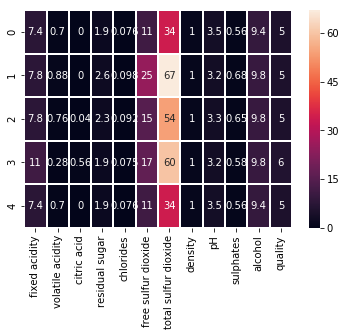

In [24]:
sns.heatmap(wines_data.head(),annot = True, 
            linewidths = 1)
plt.show()

In [22]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

In [25]:
input_data = wines_data.drop('quality',axis=1)
target_data = wines_data.quality

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data,target_data,
                                                 test_size = 0.5,
                                                 random_state = 44)

In [28]:
x_train.shape

(872, 11)

In [29]:
x_test.shape

(872, 11)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [32]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_pred = rfc.predict(x_test)
y_pred

array([6, 5, 5, 7, 6, 8, 5, 5, 6, 7, 5, 5, 6, 5, 5, 5, 8, 6, 5, 5, 5, 6,
       5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 7, 4, 6, 6, 7, 6,
       5, 6, 6, 4, 6, 6, 5, 5, 5, 7, 4, 5, 4, 7, 5, 6, 5, 6, 5, 6, 5, 5,
       7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 7, 6, 5, 5, 5, 6,
       5, 6, 7, 3, 4, 5, 5, 5, 7, 6, 7, 7, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6,
       5, 6, 6, 5, 5, 5, 3, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 7,
       6, 5, 5, 7, 5, 5, 5, 4, 8, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 3, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 4, 8, 6, 6,
       6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 5, 4, 5, 6, 5, 6, 7, 6, 5, 4, 5, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 5, 7, 5, 6, 5, 4, 7, 8, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 4, 6, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6,
       5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 5, 4, 5, 6, 5, 8, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 8, 5, 5, 7, 5, 6, 7, 6, 5, 6, 6,

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.6318807339449541


In [36]:
print(confusion_matrix(y_test,y_pred))

[[  6   1   2   0   0   0]
 [  1  19  18   7   0   0]
 [  2   7 279  71   5   0]
 [  0   4 116 188  21   0]
 [  0   2   8  49  44   1]
 [  0   0   1   3   2  15]]


In [37]:
## split dataset again with test_size = 0.3
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(input_data,
                                       target_data,
                                       test_size = 0.3,
                                       random_state = 5)

In [38]:
rfc.fit(x_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
y_pred1 = rfc.predict(x_te)

In [40]:
accuracy_score(y_te,y_pred1)

0.7232824427480916

In [43]:
x_te.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1096,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2
70,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.99620,3.44,0.58,10.7


In [45]:
y_te.head(2)

1096    5
70      5
Name: quality, dtype: int64

In [44]:
rfc.predict(x_te.head(1))

array([5], dtype=int64)

In [46]:
rfc.predict([[7.6,0.9,0.1,2.5,0.2,8.5,20,1.2,4.4,0.58,15]])

array([6], dtype=int64)

## Random Forest Regression

In [47]:
import pandas as pd
import numpy as np

In [48]:
automobiles = pd.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/automobiles.csv')
automobiles.head()

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,front,168.8,64.1,48.8,four,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,front,171.2,65.5,52.4,six,154,5000,19,26,16500
3,audi,gas,four,sedan,front,176.6,66.2,54.3,four,102,5500,24,30,13950
4,audi,gas,four,sedan,front,176.6,66.4,54.3,five,115,5500,18,22,17450


In [49]:
automobiles.isnull().sum().sum()

0

In [50]:
automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 14 columns):
make                201 non-null object
fuel-type           201 non-null object
num-of-doors        201 non-null object
body-style          201 non-null object
engine-location     201 non-null object
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
num-of-cylinders    201 non-null object
horsepower          201 non-null object
peak-rpm            201 non-null object
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 22.1+ KB


In [55]:
X = automobiles.iloc[:,[0,1,2,3,4]]
X.head(2)

,make,fuel-type,num-of-doors,body-style,engine-location
0,alfa-romero,gas,two,convertible,front
1,alfa-romero,gas,two,convertible,front


In [54]:
Y = automobiles.price

In [56]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=20)

In [57]:
rnd_reg.fit(X,Y)
# Error: could not convert string to float:
# Apply Lable Encoder to convert object type into int or float

ValueError: could not convert string to float: 'front'

In [58]:
automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 14 columns):
make                201 non-null object
fuel-type           201 non-null object
num-of-doors        201 non-null object
body-style          201 non-null object
engine-location     201 non-null object
length              201 non-null float64
width               201 non-null float64
height              201 non-null float64
num-of-cylinders    201 non-null object
horsepower          201 non-null object
peak-rpm            201 non-null object
city-mpg            201 non-null int64
highway-mpg         201 non-null int64
price               201 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 22.1+ KB


In [70]:
automobiles.select_dtypes(include = 'object')

,make,fuel-type,num-of-doors,body-style,engine-location,num-of-cylinders,horsepower,peak-rpm
0,alfa-romero,gas,two,convertible,front,four,111,5000
1,alfa-romero,gas,two,convertible,front,four,111,5000
2,alfa-romero,gas,two,hatchback,front,six,154,5000
3,audi,gas,four,sedan,front,four,102,5500
4,audi,gas,four,sedan,front,five,115,5500
5,audi,gas,two,sedan,front,five,110,5500
6,audi,gas,four,sedan,front,five,110,5500
7,audi,gas,four,wagon,front,five,110,5500
8,audi,gas,four,sedan,front,five,140,5500
9,bmw,gas,two,sedan,front,four,101,5800


In [72]:
automobiles.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', '?', '73', '82', '94', '62', '56', '112',
       '92', '161', '156', '52', '85', '114', '162', '134', '106'],
      dtype=object)

In [73]:
automobiles.corr()

,length,width,height,city-mpg,highway-mpg,price
length,1.000000,0.857170,0.492063,-0.665192,-0.698142,0.690628
width,0.857170,1.000000,0.306002,-0.633531,-0.680635,0.751265
height,0.492063,0.306002,1.000000,-0.049800,-0.104812,0.135486
city-mpg,-0.665192,-0.633531,-0.049800,1.000000,0.972044,-0.686571
highway-mpg,-0.698142,-0.680635,-0.104812,0.972044,1.000000,-0.704692
price,0.690628,0.751265,0.135486,-0.686571,-0.704692,1.000000


In [75]:
automobiles.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'engine-location',
       'length', 'width', 'height', 'num-of-cylinders', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
automobiles['make'] = le.fit_transform(automobiles['make'])
automobiles['fuel-type'] = le.fit_transform(automobiles['fuel-type'])
automobiles['num-of-doors'] = le.fit_transform(automobiles['num-of-doors'])
automobiles['body-style'] = le.fit_transform(automobiles['body-style'])
automobiles['engine-location'] = le.fit_transform(automobiles['engine-location'])

In [78]:
in_values = automobiles.drop(['num-of-cylinders',
                              'horsepower',
                              'peak-rpm','price'],
                             axis = 1)
out_values = automobiles.price

In [79]:
in_values.head(2)

,make,fuel-type,num-of-doors,body-style,engine-location,length,width,height,city-mpg,highway-mpg
0,0,1,2,0,0,168.8,64.1,48.8,21,27
1,0,1,2,0,0,168.8,64.1,48.8,21,27


In [80]:
automobiles.shape

(201, 14)

In [81]:
rnd_reg.fit(in_values,out_values) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
y_pred2 = rnd_reg.predict(in_values)

In [83]:
rnd_reg.score(in_values,out_values)

0.9775294878649173

### Task: Apply any Regression Model to Automobile.csv dataset

In [ ]:
#sno   X   Y
#-----------------
# 1   1     1 
# 2   1.5   2
# 3   3     4
# 4   5     7
# 5   3.5   5
# 6   4.5   5
# 7   3.5   4.5

In [ ]:
# Updated values of X and Y

#        Distance     Distance
#sno     of m1         of m
#-----------------------------
#1        0       <     7.211
#2       1.11     <     6.10
#3       3.60     =     3.60
#4       7.21     >       0
#5       4.71     >     2.5
#6       5.31     >     2.06
#7       4.30     >     2.91